In [1]:
#yiming
import numpy as np
import pandas as pd
import yfinance

In [2]:
#get the Tesla historic data  
df = yfinance.download('TSLA')
print(df.head())

[*********************100%***********************]  1 of 1 completed
             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500


In [3]:
#calculate the daily return
df_daily_returns = df['Adj Close'].pct_change()
print(df_daily_returns.head())

Date
2010-06-29         NaN
2010-06-30   -0.002512
2010-07-01   -0.078472
2010-07-02   -0.125683
2010-07-06   -0.160938
Name: Adj Close, dtype: float64


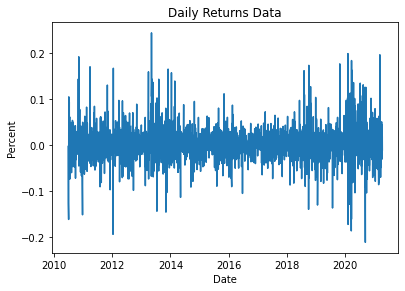

In [4]:
#plot the daily returns
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(df_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Daily Returns Data")
plt.show()

In [5]:
#Calculate the cumulative daily returns 
df_cum_returns = (df_daily_returns + 1).cumprod()
print(df_cum_returns.head())

Date
2010-06-29         NaN
2010-06-30    0.997488
2010-07-01    0.919213
2010-07-02    0.803684
2010-07-06    0.674341
Name: Adj Close, dtype: float64


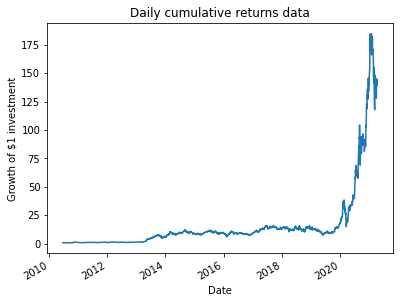

In [6]:
#plot the cumulative daily returns
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
df_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Daily cumulative returns data")
plt.show()

In [7]:
highwatermarks = df_cum_returns.cummax()

In [8]:
print(highwatermarks.dropna())

Date
2010-06-30      0.997488
2010-07-01      0.997488
2010-07-02      0.997488
2010-07-06      0.997488
2010-07-07      0.997488
                 ...    
2021-04-05    184.824205
2021-04-06    184.824205
2021-04-07    184.824205
2021-04-08    184.824205
2021-04-09    184.824205
Name: Adj Close, Length: 2713, dtype: float64


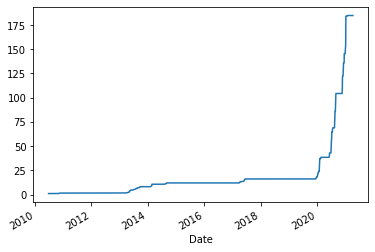

In [9]:
highwatermarks.plot()

In [10]:
#drawdown rate
drawdown_rate =(df_cum_returns-highwatermarks)/highwatermarks

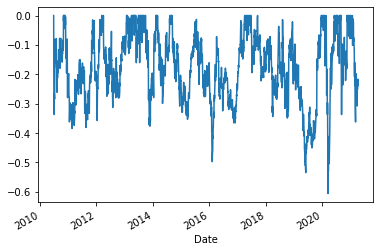

In [11]:
drawdown_rate.plot()

In [12]:
max_drawdown_rate = min(drawdown_rate.dropna())
print("ALL drawdowns rate:")
print(drawdown_rate)
print("Maximum drawdowns rate:")
print(max_drawdown_rate)

ALL drawdowns rate:
Date
2010-06-29         NaN
2010-06-30    0.000000
2010-07-01   -0.078472
2010-07-02   -0.194293
2010-07-06   -0.323961
                ...   
2021-04-05   -0.217464
2021-04-06   -0.216818
2021-04-07   -0.240202
2021-04-08   -0.225674
2021-04-09   -0.233351
Name: Adj Close, Length: 2714, dtype: float64
Maximum drawdowns rate:
-0.6062653645917144


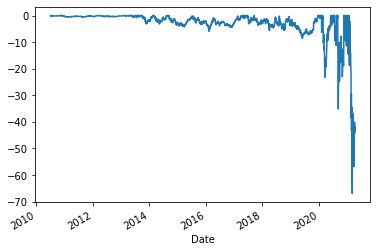

In [13]:
#drawdown depth
drawdown_depth = df_cum_returns-highwatermarks
drawdown_depth.plot()

In [14]:
max_drawdown_depth = min(drawdown_depth.dropna())
print("ALL drawdowns depth:")
print(drawdown_depth)
print("Maximum drawdowns depth:")
print(max_drawdown_depth)

ALL drawdowns depth:
Date
2010-06-29          NaN
2010-06-30     0.000000
2010-07-01    -0.078275
2010-07-02    -0.193805
2010-07-06    -0.323148
                ...    
2021-04-05   -40.192558
2021-04-06   -40.073260
2021-04-07   -44.395157
2021-04-08   -41.709930
2021-04-09   -43.128927
Name: Adj Close, Length: 2714, dtype: float64
Maximum drawdowns depth:
-66.99247279892488


In [15]:
search = 0.000000 
recoverpoint = drawdown_depth.loc[drawdown_depth.isin([search])].index.tolist()
recoverpoint

[Timestamp('2010-06-30 00:00:00'),
 Timestamp('2010-11-04 00:00:00'),
 Timestamp('2010-11-08 00:00:00'),
 Timestamp('2010-11-10 00:00:00'),
 Timestamp('2010-11-12 00:00:00'),
 Timestamp('2010-11-15 00:00:00'),
 Timestamp('2010-11-19 00:00:00'),
 Timestamp('2010-11-22 00:00:00'),
 Timestamp('2010-11-23 00:00:00'),
 Timestamp('2010-11-24 00:00:00'),
 Timestamp('2012-03-12 00:00:00'),
 Timestamp('2012-03-13 00:00:00'),
 Timestamp('2012-03-26 00:00:00'),
 Timestamp('2012-03-27 00:00:00'),
 Timestamp('2012-04-03 00:00:00'),
 Timestamp('2013-01-28 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-02-06 00:00:00'),
 Timestamp('2013-02-07 00:00:00'),
 Timestamp('2013-04-01 00:00:00'),
 Timestamp('2013-04-02 00:00:00'),
 Timestamp('2013-04-16 00:00:00'),
 Timestamp('2013-04-18 00:00:00'),
 Timestamp('2013-04-19 00:00:00'),
 Timestamp('2013-04-22 00:00:00'),
 Timestamp('2013-04-23 00:00:00'),
 Timestamp('2013-04-25 00:00:00'),
 Timestamp('2013-04-29 00:00:00'),
 Timestamp('2013-05-

In [16]:
duration = [recoverpoint[i+1]-recoverpoint[i] for i in range(len(recoverpoint)-1)]

In [17]:
print("Duration for each drawdowns:")
duration

Duration for each drawdowns:


[Timedelta('127 days 00:00:00'),
 Timedelta('4 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('4 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('474 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('13 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('300 days 00:00:00'),
 Timedelta('4 days 00:00:00'),
 Timedelta('5 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('53 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('14 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('4 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('3 days 00:00:00'),